In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [50]:
data = pd.read_csv('E:\\deeplearning\\Hepatocarcinomes\\TCGA\\processed_backup\\fpkm_final_log2-zscore_CCL3L1.csv','\t', index_col=0)

In [51]:
display(data.head(5))
print(data.shape)

,A4ND-01A,A3R2-01A,AAVY-01A,A3CJ-01A,A7ME-01A,AAUZ-01A,A8TG-01A,AACZ-01A,A116-01A,A3A3-01A,...,AADO-01A,A7S9-01A,A8TE-01A,A496-01A,A3A1-01A,AAVW-01A,A9GT-01A,A5DF-01A,A5UE-01A,A86L-01A
Gene Name,,,,,,,,,,,,,,,,,,,,,
A2M,-0.736032,-1.106771,-1.267620,1.056780,0.009570,0.997777,-0.370477,-0.758973,-0.908284,2.072793,...,0.918444,0.857520,1.239211,0.879155,0.338102,-0.229012,-0.418836,-0.928705,-2.182820,-0.733817
ACVR1C,-0.584371,-0.376119,-0.087118,-0.579618,-0.914412,0.591915,-0.485577,-0.863851,-0.369124,0.072124,...,-0.709895,-0.413380,0.191740,0.192220,-0.099736,-0.722042,0.722096,-0.381315,0.465253,0.494350
ADAM12,0.472566,-0.436172,-0.501119,-0.476934,-0.165080,-0.371921,-0.030610,-0.259617,-0.314722,-0.215018,...,-0.181578,-0.402573,-0.456387,-0.449540,-0.444659,0.382324,-0.154371,1.505552,-0.466463,-0.394915
ADM,0.390183,-0.588001,0.814804,1.730666,-1.218295,0.403515,0.555368,-0.056446,0.815892,0.234748,...,-0.203794,-0.642795,2.214742,-1.336088,0.888257,-1.357893,-0.519252,0.442186,0.298715,-1.073759
ADORA2A,-0.106720,-1.192840,1.249200,-0.204823,0.797314,0.566572,-1.113808,-0.619177,0.244844,1.260878,...,2.615223,-0.829225,1.844871,-0.277439,-0.652466,0.971425,1.584374,-0.740207,-1.072048,1.022627


(734, 340)


In [39]:
X1 = data.iloc[0:5,0:7]
display(X1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X1)
kmeans.labels_

,A4ND-01A,A3R2-01A,AAVY-01A,A3CJ-01A,A7ME-01A,AAUZ-01A,A8TG-01A
Gene Name,,,,,,,
A2M,-0.736032,-1.106771,-1.267620,1.056780,0.009570,0.997777,-0.370477
ACVR1C,-0.584371,-0.376119,-0.087118,-0.579618,-0.914412,0.591915,-0.485577
ADAM12,0.472566,-0.436172,-0.501119,-0.476934,-0.165080,-0.371921,-0.030610
ADM,0.390183,-0.588001,0.814804,1.730666,-1.218295,0.403515,0.555368
ADORA2A,-0.106720,-1.192840,1.249200,-0.204823,0.797314,0.566572,-1.113808


array([1, 1, 1, 0, 1])

In [54]:
range_n_clusters = list(range(2, 10)) # the K values to test
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


For n_clusters = 2 The average silhouette_score is : 0.305725826103981
For n_clusters = 3 The average silhouette_score is : 0.28681961073870677
For n_clusters = 4 The average silhouette_score is : 0.24539555954476486
For n_clusters = 5 The average silhouette_score is : 0.11588004046422083
For n_clusters = 6 The average silhouette_score is : 0.11648818485753865
For n_clusters = 7 The average silhouette_score is : 0.11436366490695712
For n_clusters = 8 The average silhouette_score is : 0.0979861027489729
For n_clusters = 9 The average silhouette_score is : 0.0929022501638009


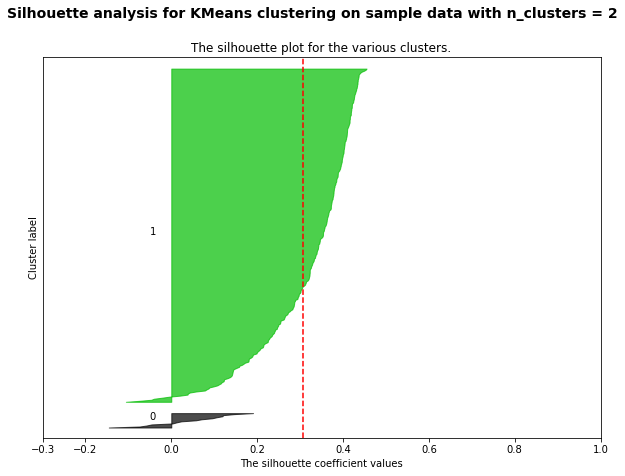

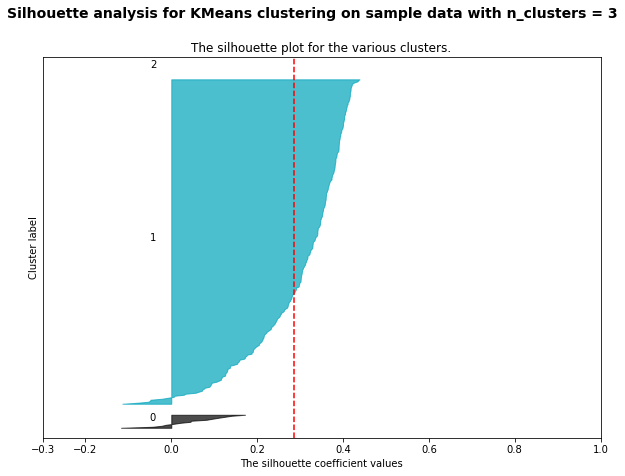

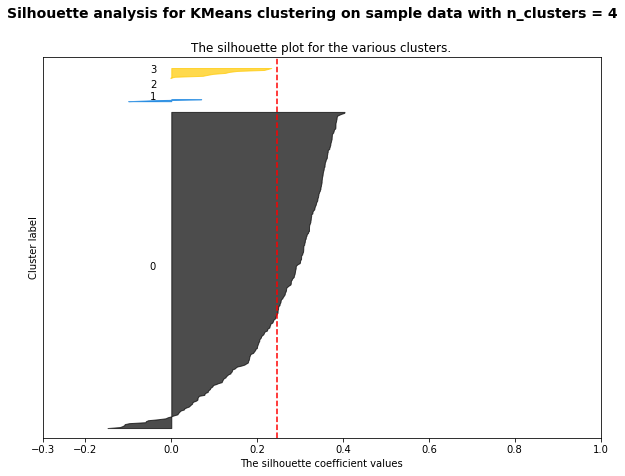

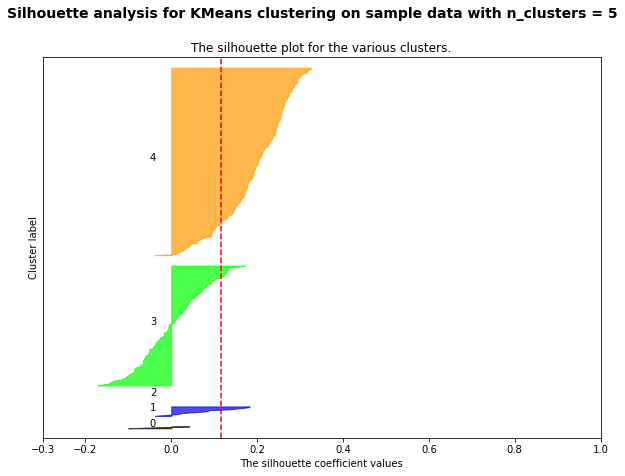

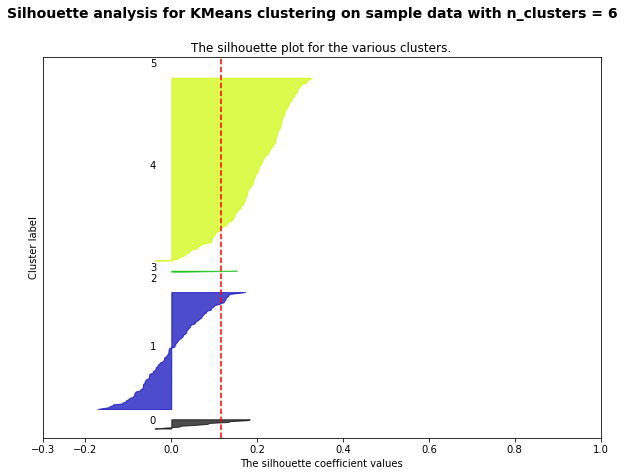

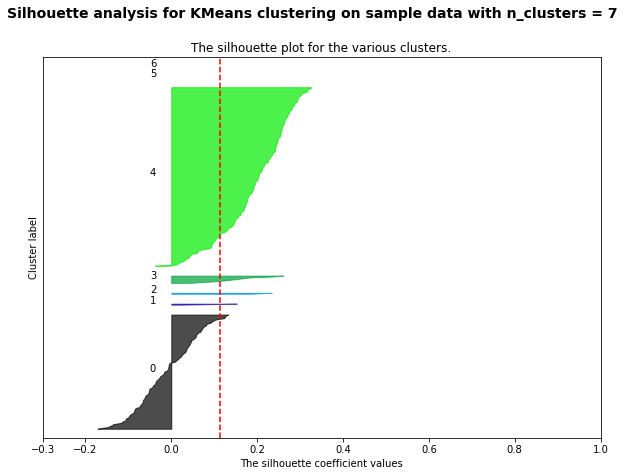

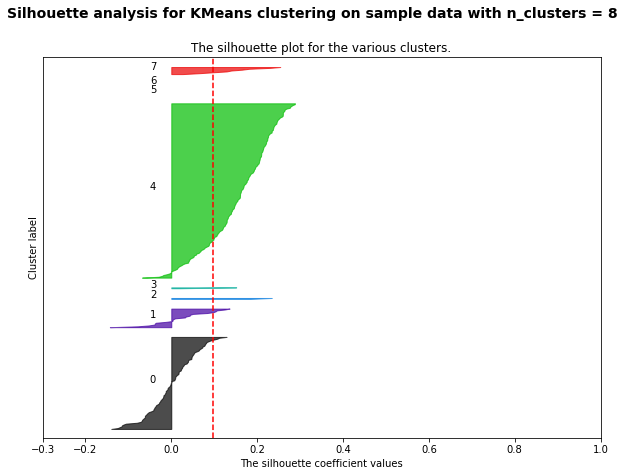

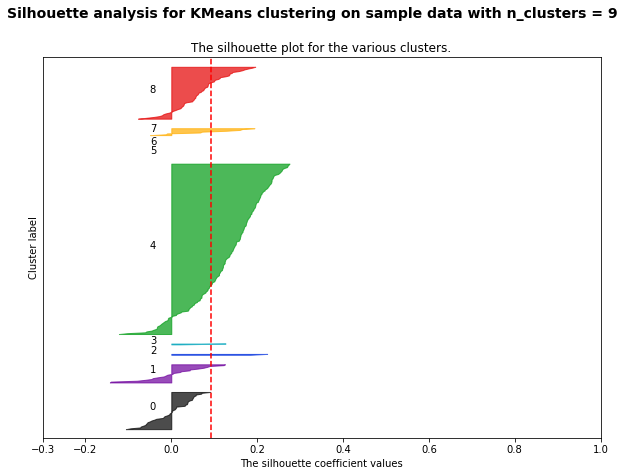

In [60]:
# data = data.T

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    # Each ROW is a SAMPLE while each COL is an attribute. So directly feed our df is GENE clustering.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='l2', linkage='complete')
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.3, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [2]:
# print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# X is the (x cor, y cor) of points, y is the label of the points
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

In [21]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


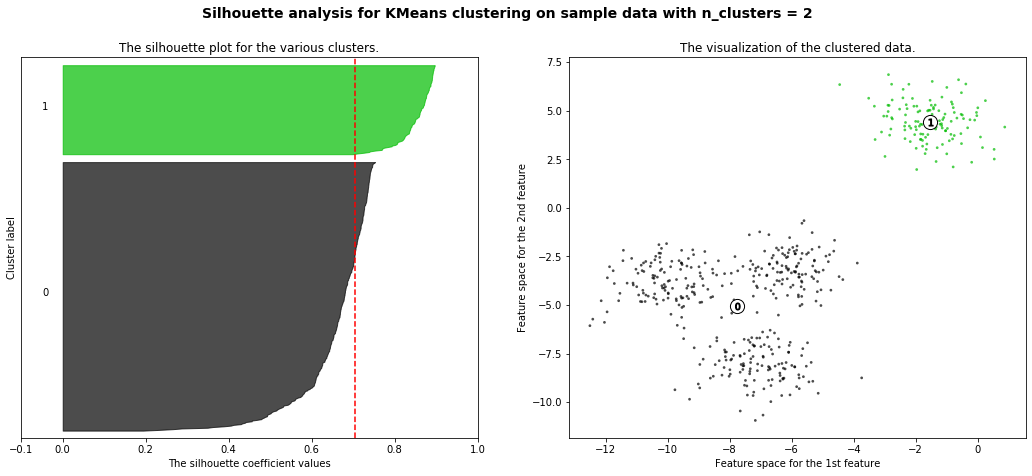

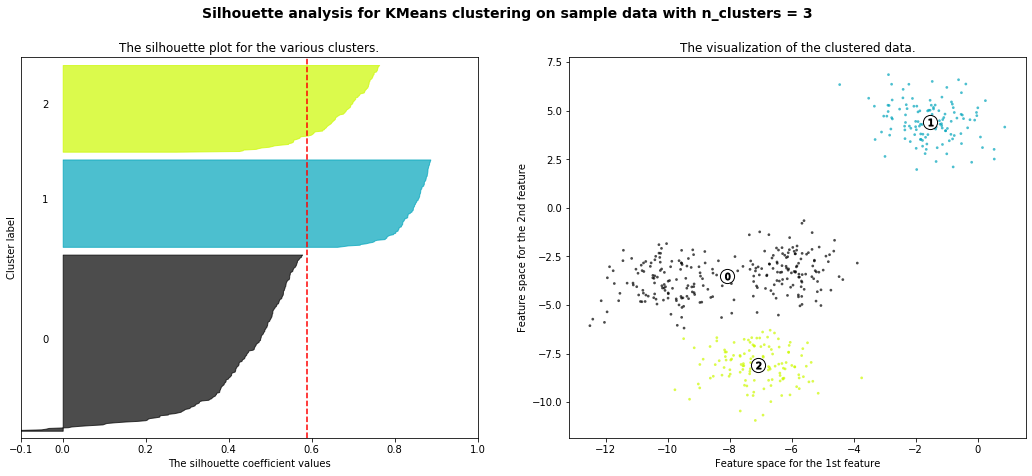

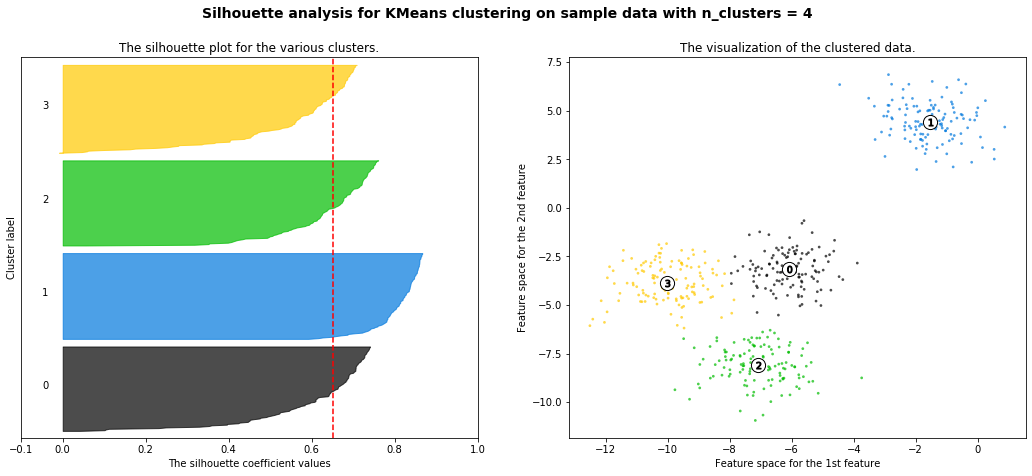

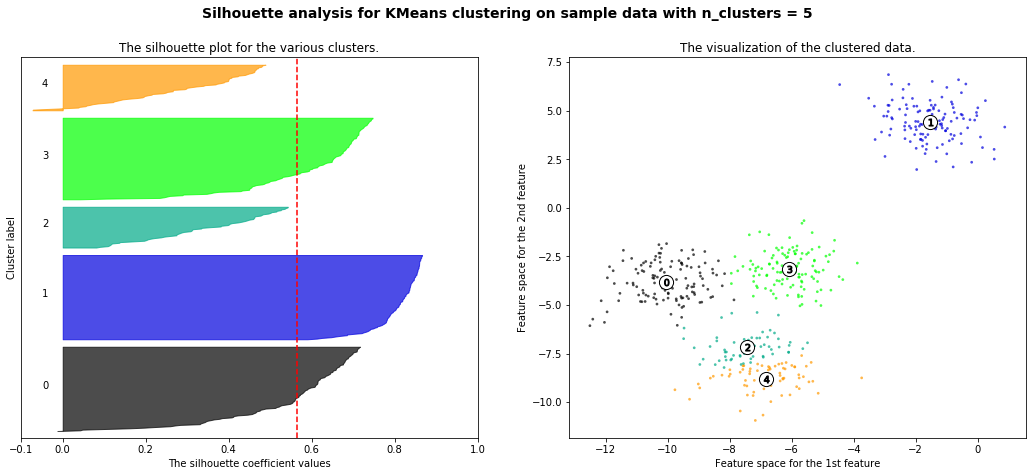

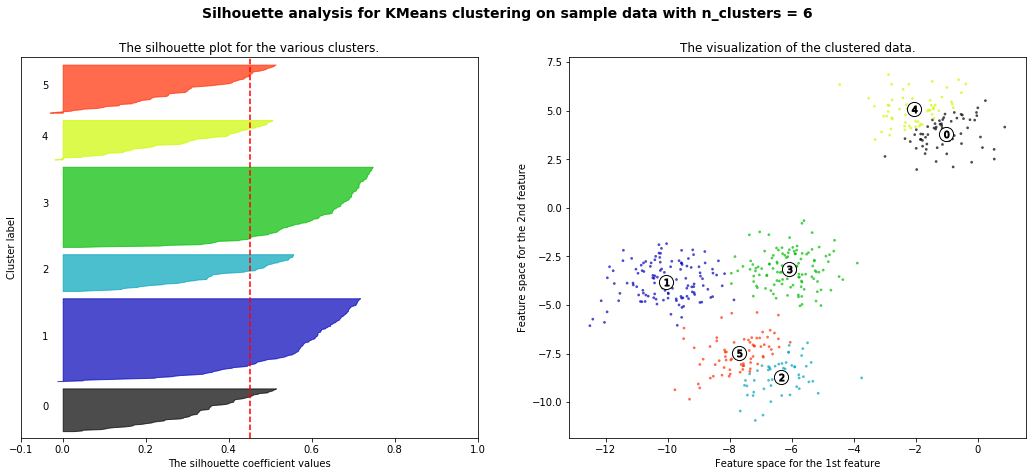

In [4]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()